In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,:4]
y = iris.target

In [ ]:
print(X[0:10])
print(y[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(X,shuffle=True,test_size=0.33,random_state=0)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [ ]:
# this is the size of our encoded representations
encoding_dim = 2
input_dim = 4

In [ ]:
# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(loss='mean_squared_error', optimizer='sgd')
autoencoder.fit(X_train, X_train,
                epochs=500,
                batch_size=135,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 100 samples, validate on 50 samples
Epoch 1/500
100/100 [==============================] - 2s 16ms/step - loss: 37.7025 - val_loss: 9.9688
Epoch 2/500
100/100 [==============================] - 0s 364us/step - loss: 10.3554 - val_loss: 6.8363
Epoch 3/500
100/100 [==============================] - 0s 41us/step - loss: 7.0932 - val_loss: 5.0521
Epoch 4/500
100/100 [==============================] - 0s 41us/step - loss: 5.2351 - val_loss: 3.8139
Epoch 5/500
100/100 [==============================] - 0s 47us/step - loss: 3.9456 - val_loss: 2.9045
Epoch 6/500
100/100 [==============================] - 0s 48us/step - loss: 2.9983 - val_loss: 2.2345
Epoch 7/500
100/100 [==============================] - 0s 46us/step - loss: 2.3003 - val_loss: 1.7482
Epoch 8/500
100/100 [==============================] - 0s 43us/step - loss: 1.7935 - val_loss: 1.4013
Epoch 9/500
100/100 [==============================] - 0s 41us/step - loss: 1.4319 - val_loss: 1.1570
Epoch 10/500
100/100 [============

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# encode and decode some data points
# note that we take them from the *test* set
encoded_datapoints = encoder.predict(X_test)
decoded_datapoints = decoder.predict(encoded_datapoints)

In [ ]:
print('Original Datapoints :')
print(X_test[0:10])
print('Reconstructed Datapoints :')
print(decoded_datapoints[0:10])

Original Datapoints :
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]]
Reconstructed Datapoints :
[[5.9652066  2.5151644  5.241566   1.8997488 ]
 [5.954404   2.9196062  4.2452097  1.4240468 ]
 [5.4847717  3.8038976  1.2433732  0.04961214]
 [7.1700225  3.0631888  6.142641   2.1692839 ]
 [5.0028567  3.3499446  1.4496872  0.21320996]
 [6.3739157  2.6217728  5.7386804  2.082865  ]
 [5.0456753  3.4191115  1.3617473  0.16533855]
 [6.6682734  3.2426775  4.7830706  1.5856472 ]
 [6.7404456  3.2208483  4.9690027  1.6649864 ]
 [6.1095495  3.066553   4.1768513  1.3704504 ]]


In [ ]:
import matplotlib.pyplot as plt
encoded_dataset = encoder.predict(X)
print(X[0:10])
print(encoded_dataset[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[-0.8337648   4.8348703 ]
 [-0.56587666  4.73588   ]
 [-0.7502444   4.477637  ]
 [-0.5754727   4.4156456 ]
 [-0.8948461   4.7106338 ]
 [-0.73940325  5.175384  ]
 [-0.7475655   4.385803  ]
 [-0.7211981   4.763111  ]
 [-0.53695434  4.2428226 ]
 [-0.6166701   4.680303  ]]


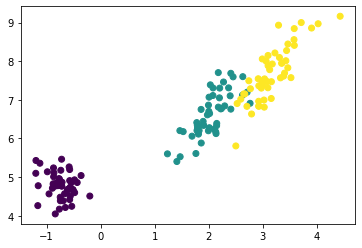

In [ ]:
plt.scatter(encoded_dataset[:,0], encoded_dataset[:,1], c=y)
plt.show()

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /tmp/autoencoder